# Recalibrating the Brunt equation using SHEBA data

## Jason Kniss
### Feb 02 2024

This script is used to process the unfiltered code, intended as a test of
functionality and for the author to practice python coding

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from matplotlib.ticker import MaxNLocator

/var/folders/19/l_xfscyd1lg1fvflh02n3ycc0000gn/T/ipykernel_51724/2517579280.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load in SHEBA data and filter flagged data
**need to make a path to the date file**

In [2]:
# Load data
tower_hrly = 'data/2024-01-31-tower-hourly/main_file6_hd.txt' # This will need to be kept updated to relative path
df = pd.read_csv(tower_hrly, delimiter='\t')

In [3]:
df.head()

,JD,lat,lon,Press,ws2.5,ws10,wd2.5,wd10,T2.5,T10,...,hsb_2.5,hsb_10,hlb_2.5,hlb_10,zob2.5,zob10,zotb2.5,zotb10,zoqb2.5,zogb10
0,302.0000,999.00000,999.00000,1014.0,9999.0,9999.0,9999,9999,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
1,302.0417,75.58191,-143.95747,1013.2,9999.0,9999.0,9999,9999,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
2,302.0833,75.58476,-143.96080,1012.4,9999.0,9999.0,9999,9999,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
3,302.1250,75.58884,-143.96479,1011.8,9999.0,9999.0,9999,9999,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
4,302.1667,75.59319,-143.97056,1011.0,9999.0,9999.0,9999,9999,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [4]:
df.describe()

,JD,lat,lon,Press,ws2.5,ws10,wd2.5,wd10,T2.5,T10,...,hsb_2.5,hsb_10,hlb_2.5,hlb_10,zob2.5,zob10,zotb2.5,zotb10,zoqb2.5,zogb10
count,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,...,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000,8112.000000
mean,470.979167,163.451549,-50.677932,1345.172485,1634.292202,1634.841232,1768.620932,1766.406312,1338.861214,898.657761,...,2378.730917,1998.043010,2382.186612,2001.524112,2381.418982,2000.539931,2381.418763,2000.539708,2381.418788,2000.539737
std,97.578209,269.053840,338.071775,1687.168790,3692.790209,3692.547940,3639.604261,3640.570155,3424.868537,2883.444751,...,4260.955641,4001.655712,4259.018845,3999.910324,4259.446578,4000.400972,4259.446701,4000.401084,4259.446687,4000.401069
min,302.000000,74.623710,-168.146050,977.200000,0.230000,0.250000,0.000000,0.000000,-41.930000,-41.110000,...,-40.900000,-35.400000,-10.100000,-8.300000,0.000450,0.000450,0.000016,0.000018,0.000022,0.000023
25%,386.489575,75.766415,-165.550363,1009.200000,2.700000,3.320000,84.000000,83.000000,-24.902500,-24.662500,...,-5.100000,-4.800000,-0.400000,-0.300000,0.000450,0.000450,0.000083,0.000081,0.000102,0.000100
50%,470.979150,76.257990,-160.159520,1016.200000,4.340000,5.020000,176.000000,170.500000,-9.180000,-10.670000,...,-0.300000,-0.500000,0.600000,0.700000,0.000450,0.000450,0.000164,0.000157,0.000194,0.000186
75%,555.468725,78.581530,-149.967293,1024.925000,7.350000,8.242500,315.000000,313.000000,-0.140000,-0.690000,...,12.700000,6.900000,15.825000,6.700000,0.000450,0.000450,0.000629,0.000414,0.000790,0.000491
max,639.958300,999.000000,999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000


In [5]:
df.columns

Index(['JD', 'lat', 'lon', 'Press', 'ws2.5', 'ws10', 'wd2.5', 'wd10', 'T2.5',
       'T10', 'q2.5', 'q10', 'rhi2.5', 'rhi10', 'T_sfc', 'T_s_epp', 'T_s_brns',
       'Tice', 'LWd', 'Lwu', 'SWd', 'Swu', 'RR_org', 'RR_ncr', 'twr_orien',
       'ww', 'u*', 'hs', 'hl', 'usb_2.5', 'usb_10', 'hsb_2.5', 'hsb_10',
       'hlb_2.5', 'hlb_10', 'zob2.5', 'zob10', 'zotb2.5', 'zotb10', 'zoqb2.5',
       'zogb10'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=8112, step=1)

In [7]:
# Replace flagged data with NaN
df.replace({9999: np.nan, 999: np.nan}, inplace=True)

 ### 1) Calculate effective emissivity

In [8]:
# Calculate effective emissivity from measured DLR and Temperature
SIGMA = 5.67e-8

In [9]:
df['T2.5_K'] = df['T2.5'] + 273.15 # Convert temperature from Celsius to Kelvin
df['T10_K'] = df['T10'] + 273.15 # Convert temperature from Celsius to Kelvin

df['eps2.5'] = df['LWd'] / (SIGMA * df['T2.5_K']**4)
df['eps10'] = df['LWd'] / (SIGMA * df['T10_K']**4)

### 2) Calculate expected DLR 
*This step will come after fitting a power curve to the measured DLR data*

In [10]:
# Calculate Partial Pressure of water vapor (Pa)
df['Pw2.5'] = ((df['q2.5'] / 1000 * (df['Press'] * 100)) / (df['q2.5'] / 1000 + 0.622))/100
df['Pw10'] = ((df['q10'] / 1000 * (df['Press'] * 100)) / (df['q10'] / 1000 + 0.622))/100

Calculate theoretical clear sky emissivity

Parameters per the original Brunt equation. **Don't Run both emissivity cells**

*Just comment out the lines you don't want to run*

In [11]:
df['e2.5'] = (0.52 + 0.065*np.sqrt(df['Pw2.5']))
df['e10'] = (0.52 + 0.065*np.sqrt(df['Pw10']))

Calibrated parameters per Li et al. 2017. **Don't Run both emissivity cells**

*Just comment out the lines you don't want to run*

In [12]:
# Calculate clear sky emissivity
# df['e2.5'] = (0.618 + 0.054*np.sqrt(df['Pw2.5']))
# df['e10'] = (0.618 + 0.054*np.sqrt(df['Pw10']))

In [13]:
# Calculate expected DLR
df['DLR2.5'] = df['e2.5']*SIGMA*(df['T2.5_K']**4)
df['DLR10'] = df['e10']*SIGMA*(df['T10_K']**4)

### 3) Generate Plots

In [14]:
# Convert Julian days to datetime
df['time'] = pd.to_datetime((df['JD']+2450449.5), origin='julian', unit='D')

# Create a mask to filter out NaN values
epsmask2 = df['eps2.5'].notna()
epsmask10 = df['eps10'].notna()
DLRmask2 = df['DLR2.5'].notna() & df['LWd'].notna()
DLRmask10 = df['DLR10'].notna() & df['LWd'].notna()

*NOTE*: if you comment out the line containing `plt.savefig` then the cell won't save the plot every time.

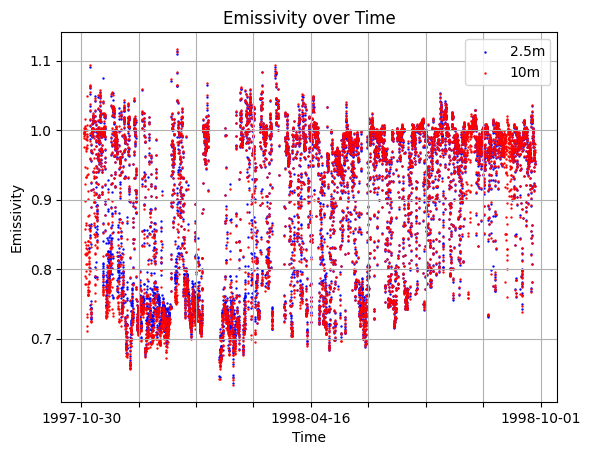

In [15]:
## Plot e_sky over time
plt.scatter(df['time'][epsmask2], df['eps2.5'][epsmask2], label='2.5m', s=0.5, color='blue')
plt.scatter(df['time'][epsmask10], df['eps10'][epsmask10], label='10m', s=0.5, color='red')

# Set ticks at regular intervals
# Find the start and end dates in your DataFrame
start_date = df['time'].min()
end_date = df['time'].max()

# Generate ticks at regular intervals between start and end dates
ticks = pd.date_range(start=start_date, end=end_date, freq='42D')
tick_labels = [date.strftime('%Y-%m-%d') if i % 4 == 0 else None for i, date in enumerate(ticks)]

# Format the plot
plt.xticks(ticks, tick_labels)
plt.xlabel('Time')
plt.ylabel('Emissivity')
plt.title('Emissivity over Time')
plt.legend()
plt.grid()

# Save plot as .png
# plt.savefig('emissivity.png')

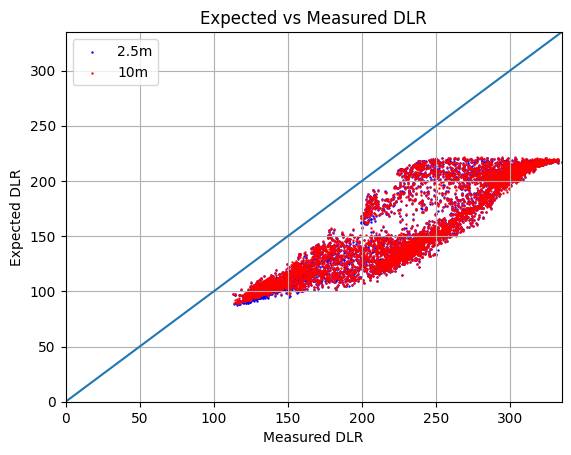

In [16]:
## Plot expected DLR vs measured DLR
plt.scatter(df['LWd'][DLRmask2], df['DLR2.5'][DLRmask2], label='2.5m', s=0.5, color='blue')
plt.scatter(df['LWd'][DLRmask10], df['DLR10'][DLRmask10], label='10m', s=0.5, color='red')

# Calculate the maximum value for x and y
max_value = max(np.nanmax(df['LWd'][DLRmask2]), np.nanmax(df['DLR2.5'][DLRmask2]))
plt.xlim(0, max_value)
plt.ylim(0, max_value)
plt.grid()
plt.plot([0,max_value],[0,max_value])

# Format the plot
plt.xlabel('Measured DLR')
plt.ylabel('Expected DLR')
plt.title('Expected vs Measured DLR')
plt.legend()

# Save plot as .png
# plt.savefig('exp-vs-measured-DLR.png')

### Notes on Next Steps:

* You should use the datetimes as the index of the `pd.DataFrame` rather than the default `RangeIndex` which are zero-indexed integers.
  * This will allow us to slice using the index, which will be cleaner
  * Run `df.index`, `type(df.index)`, `df.index.values`, and `type(df.index.values)` to see what I mean.
*  It looks like the data has slightly uneven time steps (run `df["time"][:24]` to see what I mean)
  * Since these are hourly data point (not sure if they are hourly averages, **you may want to look for higher resolution data**) we most likely want to resample into houlry averages
  * You should be able to do this with something like the `resample` method from `pandas` using `mean` and `hourly`.
    * I'm not completely clear on the syntax, so you will need to look it up and confirm
* Once you have the `datetimeindex` and have resampled the data so the timesteps are on the hour you will be ready to filter times that are only clear
  * Add a column to the `dataframe` called `"isclear"` (or similar) and ramdomly add `True` and `False` to this column.
  * Then try to reporduce the plots, but only when the random column you added has `True` and `False`
  * I will be able to generate this file and send it to you once I look at the radar data